### [Technical Indicators for Algorithmic Trading](https://medium.com/@kridtapon/4-must-have-technical-indicators-for-algorithmic-trading-b054f5e76711)

> A practical guide to using STC, CHOP, VZO, and CMF to improve trend analysis and decision-making.

Using indicators to create a trading system is the easiest method, ideal for home traders.

#### Schaff Trend Cycle (STC)

The *Schaff Trend Cycle (STC)* is a momentum indicator that improves upon the traditional MACD. It helps identify trends and reversals faster than MACD or RSI.

- **Above 75:** Overbought condition (potential reversal down).
- **Below 25:** Oversold condition (potential reversal up).
- **Crossing above 50:** Signals a bullish trend.
- **Crossing below 50:** Signals a bearish trend.

#### Choppiness Index (CHOP)

The *Choppiness Index (CHOP)* is a volatility indicator that determines whether the market is trending or moving sideways.

- **Above 61.8:** Indicates a choppy (sideways) market.
- **Below 38.2:** Suggests a trending market.
- **When decreasing:** Expect a strong price movement soon.

#### Volume Zone Oscillator (VZO)

The *Volume Zone Oscillator (VZO)* measures buying and selling pressure based on volume flow. It helps traders identify accumulation and distribution zones.

- **Above +40:** Strong bullish momentum.
- **Below -40:** Strong bearish momentum.
- **Crossing above 0:** Bullish trend confirmation.
- **Crossing below 0:** Bearish trend confirmation.

#### Chaikin Money Flow (CMF)

The *Chaikin Money Flow (CMF)* indicator measures the strength of money flow over a specific period, helping traders confirm trends based on volume.

- **Above +0.2:** Strong buying pressure.
- **Below -0.2:** Strong selling pressure.
- **Crossing above 0:** Bullish confirmation.
- **Crossing below 0:** Bearish confirmation.

In [1]:
!pip install -q pandas numpy matplotlib seaborn yfinance

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# Define the stock symbol and time period
symbol = '^GSPC'  # Example stock symbol
start_date = '2020-01-01'
end_date = '2025-01-01'

In [5]:
# Download the stock data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
# 1. Calculate Schaff Trend Cycle (STC)
def calculate_stc(df, short_ema=12, long_ema=26, stoch_period=10, signal_period=3):
    df['Short_EMA'] = df['Close'].ewm(span=short_ema).mean()
    df['Long_EMA'] = df['Close'].ewm(span=long_ema).mean()
    macd = df['Short_EMA'] - df['Long_EMA']
    df['MACD_Signal'] = macd.ewm(span=9).mean()
    macd_diff = macd - df['MACD_Signal']
    lowest_macd = macd_diff.rolling(stoch_period).min()
    highest_macd = macd_diff.rolling(stoch_period).max()
    df['STC'] = 100 * ((macd_diff - lowest_macd) / (highest_macd - lowest_macd))
    return df['STC']

df['STC'] = calculate_stc(df)

In [7]:
# 2. Calculate Choppiness Index (CHOP)
def calculate_choppiness_index(df, period=14):
    high_low_range = df['High'] - df['Low']
    atr = high_low_range.rolling(window=period).sum()
    max_high = df['High'].rolling(window=period).max()
    min_low = df['Low'].rolling(window=period).min()
    chop = 100 * np.log10(atr / (max_high - min_low)) / np.log10(period)
    return chop

df['CHOP'] = calculate_choppiness_index(df)

In [8]:
# 3. Calculate Volume Zone Oscillator (VZO)
def calculate_vzo(df, period=14):
    close_diff = df['Close'].diff()
    positive_volume = df['Volume'].where(close_diff > 0, 0)
    negative_volume = df['Volume'].where(close_diff < 0, 0)
    total_volume = df['Volume'].rolling(window=period).sum()
    vzo = 100 * (positive_volume.rolling(window=period).sum() - negative_volume.rolling(window=period).sum()) / total_volume
    return vzo

df['VZO'] = calculate_vzo(df)

In [9]:
# 4. Calculate Chaikin Money Flow (CMF)
def calculate_cmf(df, period=20):
    money_flow = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    money_flow_volume = money_flow * df['Volume']
    cmf = money_flow_volume.rolling(window=period).sum() / df['Volume'].rolling(window=period).sum()
    return cmf

df['CMF'] = calculate_cmf(df)

In [10]:
df.head(10)

,Close,High,Low,Open,Volume,Short_EMA,Long_EMA,MACD_Signal,STC,CHOP,VZO,CMF
Date,,,,,,,,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000,3257.850098,3257.850098,0.000000,NaN,NaN,NaN,NaN
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000,3245.391764,3245.907790,-0.286681,NaN,NaN,NaN,NaN
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000,3245.738454,3246.041532,-0.293401,NaN,NaN,NaN,NaN
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000,3243.036863,3243.564216,-0.372653,NaN,NaN,NaN,NaN
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000,3245.757410,3245.764020,-0.263763,NaN,NaN,NaN,NaN
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000,3252.791970,3251.559656,0.141757,NaN,NaN,NaN,NaN
2020-01-10,3265.350098,3282.989990,3260.860107,3281.810059,3214580000,3255.594272,3254.012214,0.506259,NaN,NaN,NaN,NaN
2020-01-13,3288.129883,3288.129883,3268.429932,3271.129883,3459390000,3262.383953,3259.509416,1.075400,NaN,NaN,NaN,NaN
2020-01-14,3283.149902,3294.250000,3277.189941,3285.350098,3687620000,3266.492197,3263.013455,1.630584,NaN,NaN,NaN,NaN


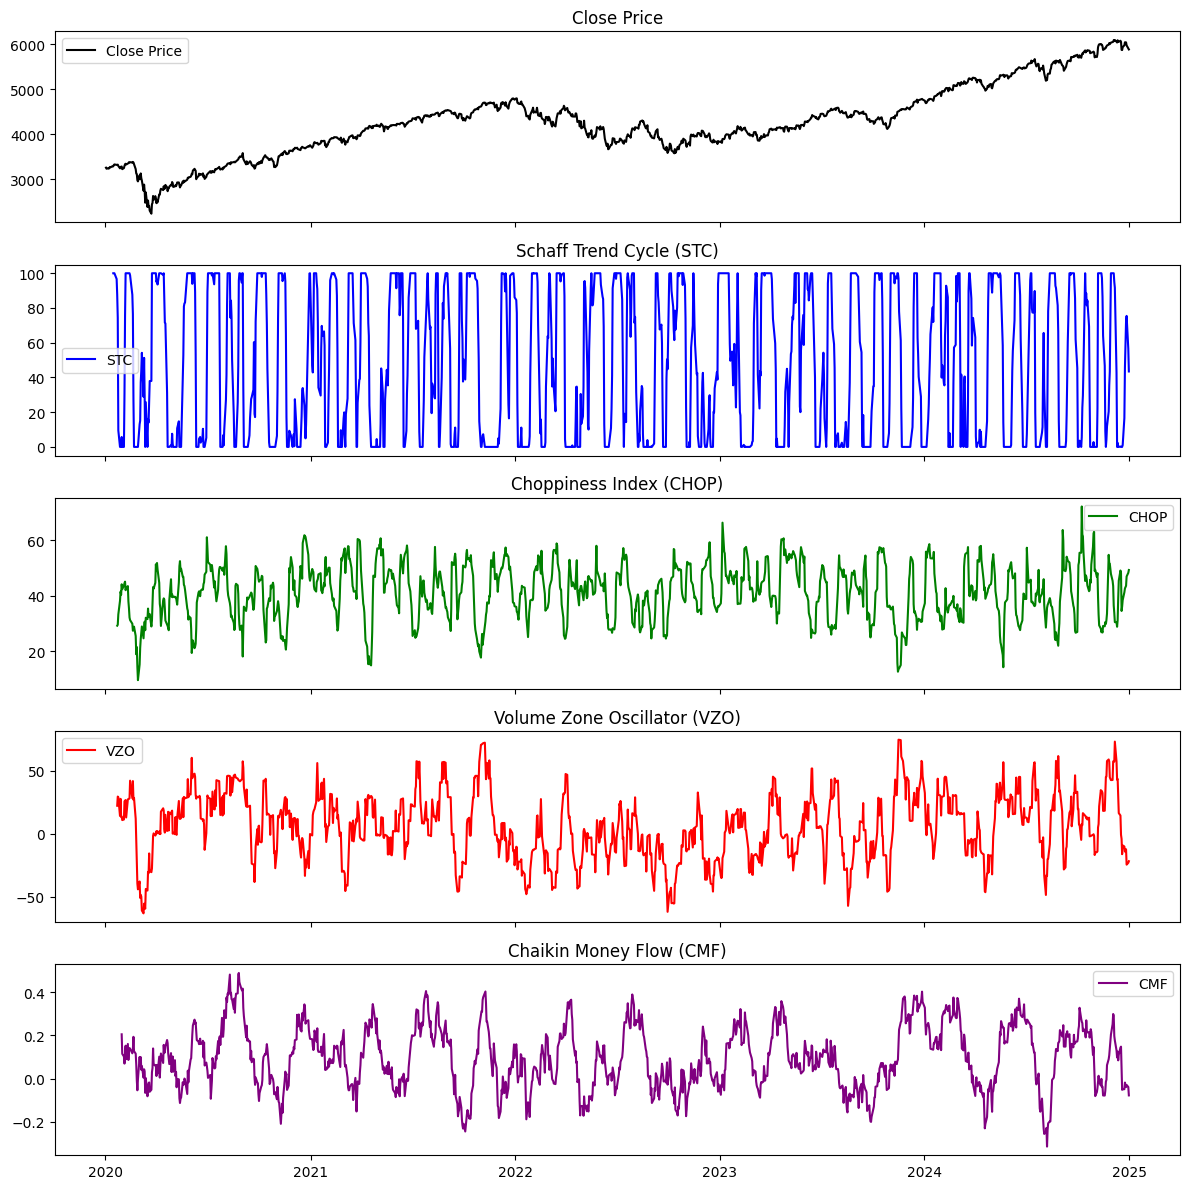

In [11]:
# Plot the indicators
fig, axs = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

# Plot close price
axs[0].plot(df.index, df['Close'], label='Close Price', color='black')
axs[0].set_title('Close Price')
axs[0].legend()

# Plot STC
axs[1].plot(df.index, df['STC'], label='STC', color='blue')
axs[1].set_title('Schaff Trend Cycle (STC)')
axs[1].legend()

# Plot CHOP
axs[2].plot(df.index, df['CHOP'], label='CHOP', color='green')
axs[2].set_title('Choppiness Index (CHOP)')
axs[2].legend()

# Plot VZO
axs[3].plot(df.index, df['VZO'], label='VZO', color='red')
axs[3].set_title('Volume Zone Oscillator (VZO)')
axs[3].legend()

# Plot CMF
axs[4].plot(df.index, df['CMF'], label='CMF', color='purple')
axs[4].set_title('Chaikin Money Flow (CMF)')
axs[4].legend()

plt.tight_layout()
plt.show()